## Experiment 10

### Data Sampling and Stratification: Implement data sampling techniques to generate representative subsets of large datasets, and stratify the data based on specific criteria for balanced sampling.

### Importing Required Libraries

In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

### Loading Dataset

In [4]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Initial exploration of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### 1. Random Sampling

Random sampling involves selecting a random subset from the data. It is the simplest method and is useful when the dataset is relatively balanced and no specific subgroup prioritization is required.

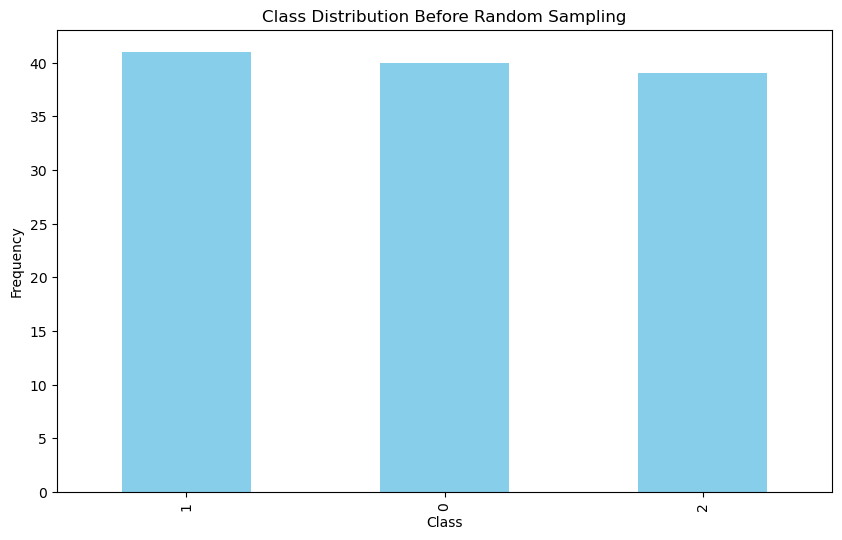

In [5]:
# ===================== Random Sampling =====================
# Split the dataset into training and testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Visualize class distribution before sampling
plt.figure(figsize=(10, 6))
y_train.value_counts().plot(kind='bar', color='skyblue', title="Class Distribution Before Random Sampling")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### After Sampling

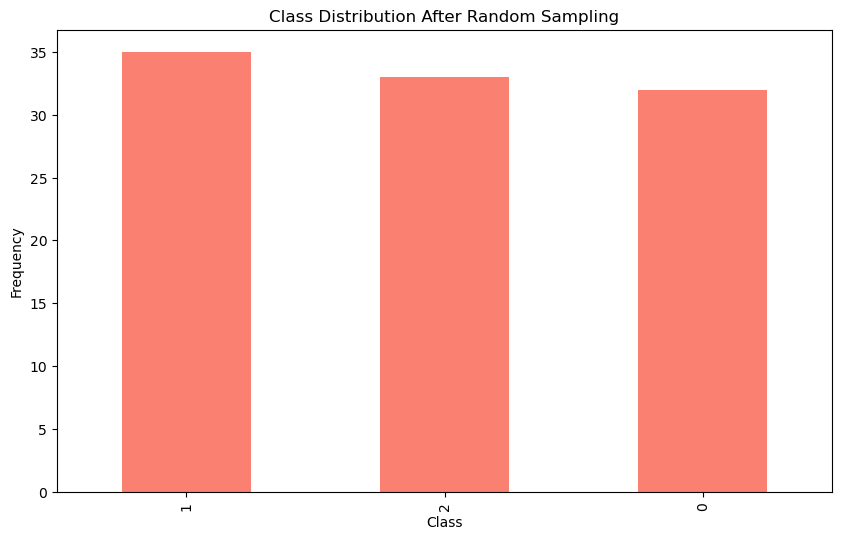

In [6]:
# Random sampling to generate a balanced dataset (100 samples)
X_resampled, y_resampled = resample(X_train, y_train, n_samples=100, random_state=42)

# Visualize class distribution after random sampling
plt.figure(figsize=(10, 6))
y_resampled.value_counts().plot(kind='bar', color='salmon', title="Class Distribution After Random Sampling")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 2. Stratified Sampling

Stratified sampling divides the population into subgroups (strata) based on certain criteria and ensures that each subgroup is proportionally represented in the sample. This method is especially important when the dataset is imbalanced or has skewed distributions, as it helps to maintain diversity in the sample.

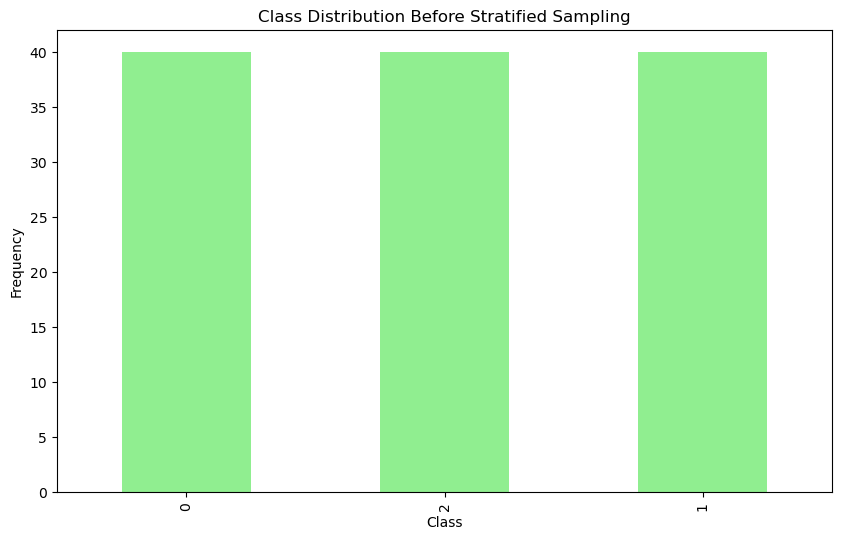

In [9]:
# ===================== Stratified Sampling =====================
# Stratified sampling ensures that each class is represented proportionally in the samples.
# Here, we apply stratified sampling to ensure balanced sampling based on the target variable

# Stratified Sampling with scikit-learn's train_test_split (stratify=y_train)
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    data.drop('target', axis=1), data['target'], test_size=0.2, stratify=data['target'], random_state=42)

# Visualize class distribution before stratified sampling
plt.figure(figsize=(10, 6))
y_train_stratified.value_counts().plot(kind='bar', color='lightgreen', title="Class Distribution Before Stratified Sampling")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### After Sampling

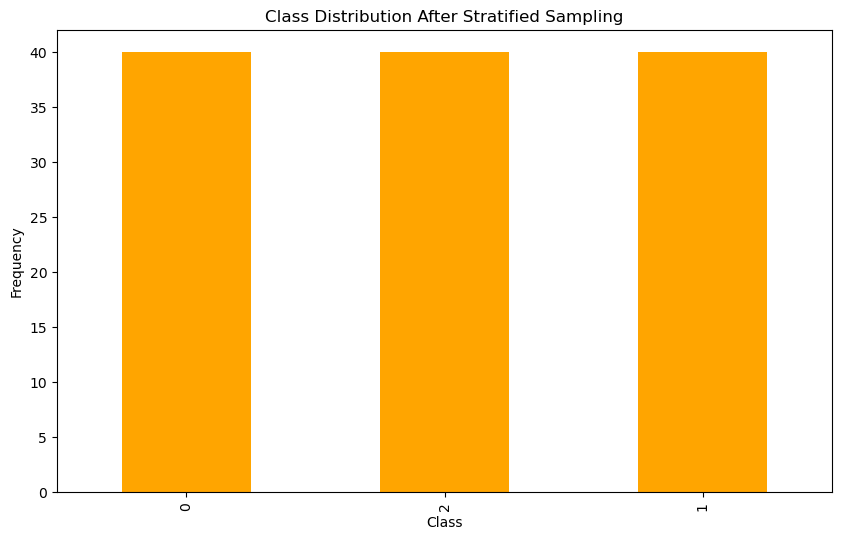

In [10]:
# Visualize class distribution after stratified sampling
plt.figure(figsize=(10, 6))
y_train_stratified.value_counts().plot(kind='bar', color='orange', title="Class Distribution After Stratified Sampling")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 3. Statistical Measures

We calculated the following statistical measures to understand the effect of sampling:

- **Mean**: Measures the central tendency of each feature.
- **Standard Deviation**: Indicates the spread of the data.
- **Variance**: A squared measure of data spread, showing how far individual data points are from the mean.

In [11]:
# ===================== Statistical Measures =====================
# Calculate and print various statistical measures for the original and resampled data

# Original data
original_mean = data.mean()
original_std = data.std()

# Resampled data
resampled_mean = pd.DataFrame(X_resampled).mean()
resampled_std = pd.DataFrame(X_resampled).std()

print(f"Original Data - Mean:\n{original_mean}\n")
print(f"Original Data - Standard Deviation:\n{original_std}\n")
print(f"Resampled Data - Mean:\n{resampled_mean}\n")
print(f"Resampled Data - Standard Deviation:\n{resampled_std}\n")

Original Data - Mean:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

Original Data - Standard Deviation:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

Resampled Data - Mean:
sepal length (cm)    5.829
sepal width (cm)     3.097
petal length (cm)    3.788
petal width (cm)     1.238
dtype: float64

Resampled Data - Standard Deviation:
sepal length (cm)    0.778407
sepal width (cm)     0.484394
petal length (cm)    1.752590
petal width (cm)     0.765913
dtype: float64



In [12]:
# ===================== Additional Measures =====================
# Calculate variance for original and resampled datasets
original_variance = data.var()
resampled_variance = pd.DataFrame(X_resampled).var()

print(f"Original Data - Variance:\n{original_variance}\n")
print(f"Resampled Data - Variance:\n{resampled_variance}\n")


Original Data - Variance:
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64

Resampled Data - Variance:
sepal length (cm)    0.605918
sepal width (cm)     0.234637
petal length (cm)    3.071572
petal width (cm)     0.586622
dtype: float64

